The GARCH (Generalized Autoregressive Conditional Heteroskedasticity) model is designed to model time-varying volatility in financial time series, capturing the phenomenon of volatility clustering—where large changes in returns are followed by more large changes. 

The most common form, GARCH(1,1), models the conditional variance (σ²ₜ) as a function of a constant, the previous period’s squared residual (ε²ₜ₋₁), and the previous period’s variance (σ²ₜ₋₁). The formula is:
σ²ₜ = ω + αε²ₜ₋₁ + βσ²ₜ₋₁,

where ω > 0 is a constant, α ≥ 0 measures the impact of past shocks, and β ≥ 0 captures the persistence of past volatility. The sum (α + β) indicates the persistence of volatility—values close to 1 imply long memory. GARCH models assume that although the time series itself may be unpredictable, its variance can be predicted based on past behavior. This is particularly useful in financial applications like option pricing, risk forecasting (e.g., Value at Risk), and portfolio allocation, where understanding and anticipating changes in market volatility is critical.

The AR-GARCH model combines an autoregressive (AR) component in the mean equation with a standard GARCH model for the variance. The mean equation captures autocorrelation in returns through past values, while the GARCH part models time-varying volatility based on past squared residuals and past volatility, making it suitable for financial series with autocorrelation in both returns and volatility.

 The EGARCH (Exponential GARCH) model models the logarithm of variance, ensuring that volatility is always positive and capturing asymmetric effects, such as the "leverage effect," where negative shocks increase volatility more than positive shocks. The GJR-GARCH model further introduces an indicator function to account for asymmetric volatility, particularly when negative shocks have a larger impact on volatility, capturing the downside risk. All these models are useful for modeling volatility clustering and time-varying volatility in financial markets, with EGARCH and GJR-GARCH specifically addressing the asymmetric responses of volatility to positive and negative news.



GARCH (Generalized Autoregressive Conditional Heteroskedasticity) and its variants—AR-GARCH, EGARCH, and GJR-GARCH—are widely used models in financial econometrics to capture and forecast time-varying volatility in asset returns, a common feature known as volatility clustering. The basic GARCH model explains current volatility as a function of past squared shocks and past volatility, making it suitable for modeling returns with periods of high and low volatility. AR-GARCH extends this by incorporating autoregressive terms to capture trends or patterns in the return series itself. 

EGARCH (Exponential GARCH) further improves the model by allowing for asymmetry in how positive and negative shocks affect volatility, using a logarithmic form to ensure non-negative variance without imposing constraints on parameters. 

GJR-GARCH also accounts for asymmetry by including an indicator function that allows negative shocks (bad news) to have a stronger impact on volatility than positive ones. These models are especially useful in risk management, options pricing, portfolio optimization, and forecasting market volatility. Their main benefit lies in their ability to accurately reflect the real-world behavior of financial time series, especially during periods of market stress or turbulence.

In [ ]:
!pip install yfinance
!pip install pandas-datareader


import yfinance as yf

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
import seaborn as sns
from datetime import datetime
from functools import reduce


from pandas_datareader import data as pdr

!pip install arch
from arch import arch_model


from statsmodels.graphics.tsaplots import plot_acf

from statsmodels.stats.diagnostic import acorr_ljungbox

from sklearn.metrics import mean_absolute_error, mean_squared_error


sns.set_style("darkgrid")


style.use("fivethirtyeight")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.3/985.3 kB 12.0 MB/s eta 0:00:00


STEP 1 : IMPORT DATA FROM Y FINANCE 

[*********************100%***********************]  1 of 1 completed


Text(2020-06-11 00:00:00, 9.060326432240174, 'S&P 500')

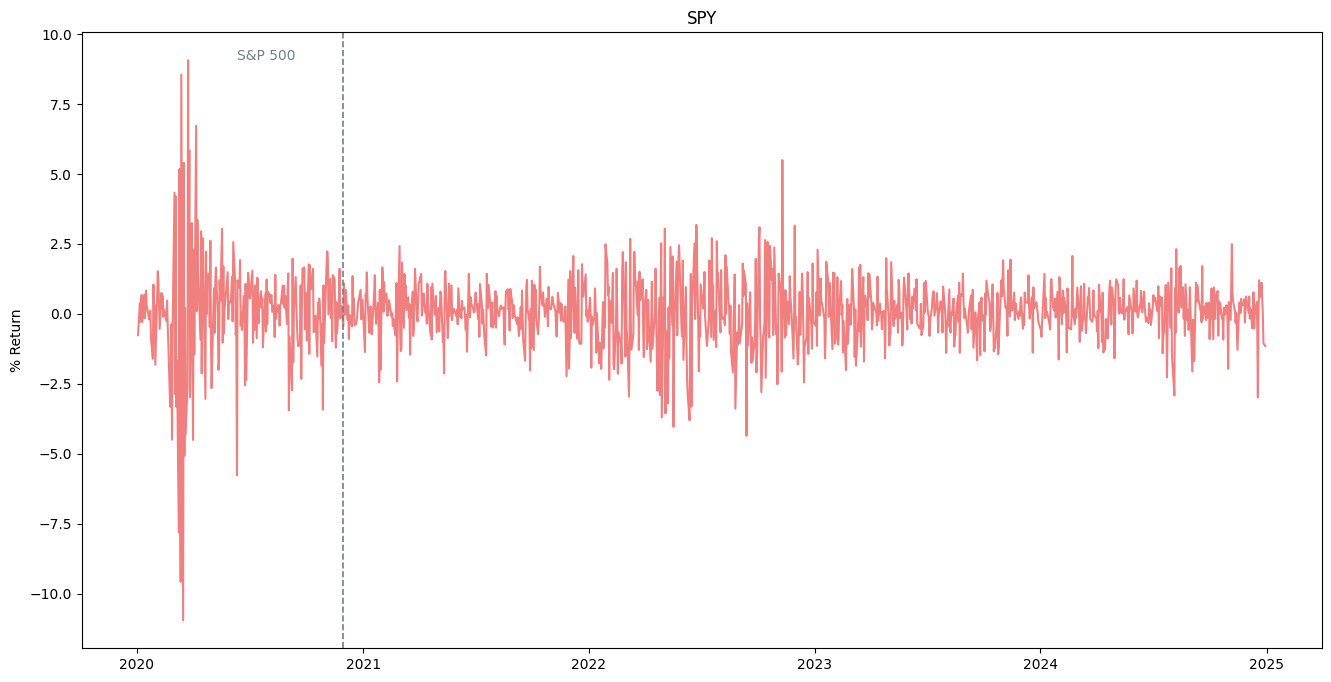

In [ ]:

spy = yf.download('SPY', start='2020-01-01', end='2024-12-31')
spy = spy[['Close']]


spy['return'] = spy.pct_change().dropna() * 100


fig, ax = plt.subplots(figsize=(16,8))
ax.plot(spy['return'].dropna(), color='lightcoral')
ax.set(title='SPY', ylabel='% Return')


ax.axvline(pd.to_datetime('2020-11-30'), color='slategray', lw=1.2, linestyle='--')
ax.text(pd.to_datetime('2020-06-11'), max(spy['return'].dropna()), 'S&P 500', color='slategray')

STEP 2 : DROP NaN values and Compute Daily volatility , Monthly Volatiity , Yearly Volatility 

In [ ]:


spy.dropna(inplace=True)

daily_volatility = spy['return'].std()
print('Daily volatility: ', '{:.2f}%'.format(daily_volatility))

monthly_trade_days = 21
monthly_volatility = np.sqrt(monthly_trade_days) * daily_volatility
print('Monthly volatility: ', '{:.2f}%'.format(monthly_volatility))

yearly_trade_days = 252
yearly_volatility = np.sqrt(yearly_trade_days) * daily_volatility
print('Yearly volatility: ', '{:.2f}%'.format(yearly_volatility))

Daily volatility:  1.32%
Monthly volatility:  6.06%
Yearly volatility:  21.00%


In [ ]:



spy = yf.download('SPY', start='2020-01-01', end='2024-12-31')
spy = spy[['Close']]


spy['return'] = spy.pct_change().dropna() * 100


spy.dropna(inplace=True)
spy = spy[np.isfinite(spy['return'])]


basic_gm = arch_model(spy['return'], p=1, q=1, mean='constant', vol='GARCH', dist='normal')
gm_result = basic_gm.fit()

[*********************100%***********************]  1 of 1 completed

Iteration:      1,   Func. Count:      6,   Neg. LLF: 30157509515.30516
Iteration:      2,   Func. Count:     14,   Neg. LLF: 1182290617.3913755
Iteration:      3,   Func. Count:     21,   Neg. LLF: 2303.419826829365
Iteration:      4,   Func. Count:     27,   Neg. LLF: 1992.392929075765
Iteration:      5,   Func. Count:     34,   Neg. LLF: 2267.136852080631
Iteration:      6,   Func. Count:     40,   Neg. LLF: 1824.4072182533337
Iteration:      7,   Func. Count:     45,   Neg. LLF: 1824.3971179856787
Iteration:      8,   Func. Count:     50,   Neg. LLF: 1824.395059082198
Iteration:      9,   Func. Count:     55,   Neg. LLF: 1824.394803633395
Iteration:     10,   Func. Count:     60,   Neg. LLF: 1824.394796405059
Iteration:     11,   Func. Count:     64,   Neg. LLF: 1824.3947964043089
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1824.394796405059
            Iterations: 11
            Function evaluations: 64
            Gradient evaluations

RUN GARCH MODEL AND GET SUMMARY STATISTICS 

In [ ]:
gm_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                 return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1824.39
Distribution:                  Normal   AIC:                           3656.79
Method:            Maximum Likelihood   BIC:                           3677.33
                                        No. Observations:                 1256
Date:                Fri, May 09 2025   Df Residuals:                     1255
Time:                        04:41:00   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0936  2.534e-02      3.694  2.205e-04 [4.394e-02,  0.143]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0537  1.965e-02      2.734  6.255e-03 [1.521e-02,9.222e-02]
alpha[1]       0.1568  3.552e-02      4.415  1.008e-05   [8.722e-02,  0.226]
beta[1]        0.8064  4.064e-02     19.842  1.291e-87     [  0.727,  0.886]
============================================================================

Covariance estimator: robust
"""

PLOT THE TEST RESULTS 

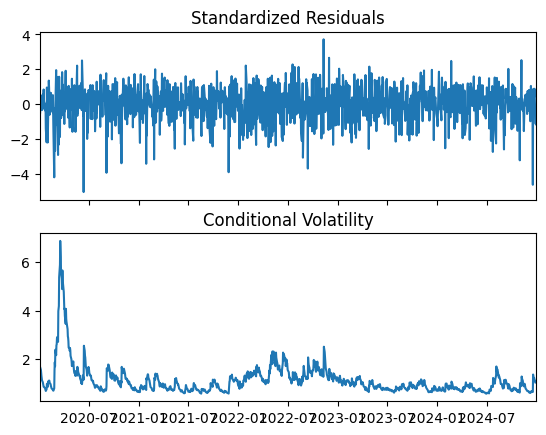

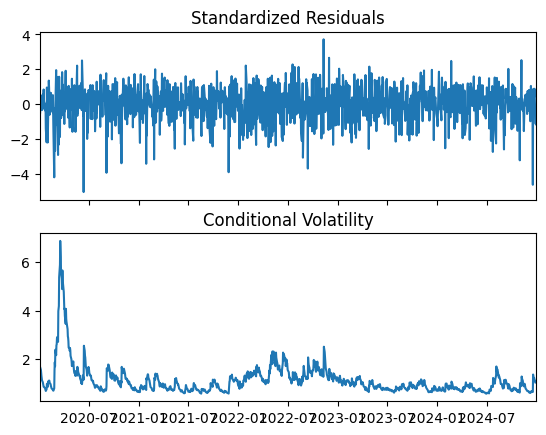

In [ ]:
gm_result.plot()

In [ ]:

gm_forecast = gm_result.forecast(horizon = 5)


print(gm_forecast.variance[-1:])

                 h.1      h.2       h.3       h.4       h.5
Date                                                       
2024-12-30  1.209963  1.21915  1.227999  1.236523  1.244733


[Text(0.5, 1.0, 'Distribution of Standardized Residuals')]

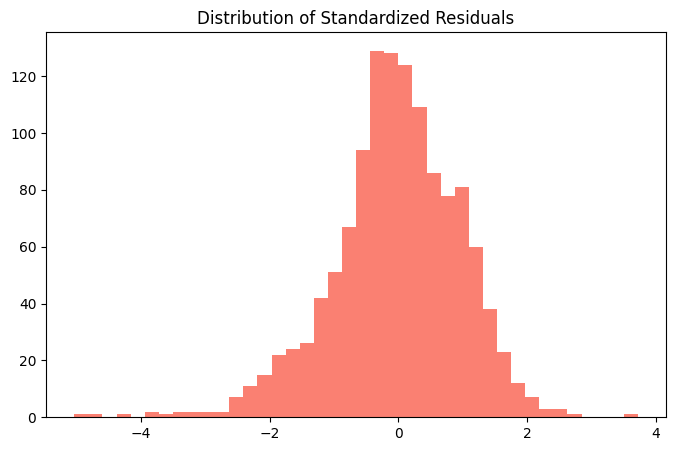

In [ ]:

gm_std_resid = gm_result.resid / gm_result.conditional_volatility


fig, ax = plt.subplots(figsize=(8,5))
ax.hist(gm_std_resid, color='salmon', bins=40)
ax.set(title='Distribution of Standardized Residuals')

In [ ]:
skewt_gm = arch_model(spy['return'], p=1, q=1, mean='constant', vol='GARCH', dist='skewt')
skewt_result = skewt_gm.fit()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 100253.83006113203
Iteration:      2,   Func. Count:     18,   Neg. LLF: 165136.34546929065
Iteration:      3,   Func. Count:     27,   Neg. LLF: 44550.58497948499
Iteration:      4,   Func. Count:     35,   Neg. LLF: 29860.720405887085
Iteration:      5,   Func. Count:     43,   Neg. LLF: 1810.7894568521901
Iteration:      6,   Func. Count:     51,   Neg. LLF: 2423.188100396299
Iteration:      7,   Func. Count:     59,   Neg. LLF: 1797.4653776547793
Iteration:      8,   Func. Count:     67,   Neg. LLF: 1806.8406028940385
Iteration:      9,   Func. Count:     75,   Neg. LLF: 1795.732966749151
Iteration:     10,   Func. Count:     83,   Neg. LLF: 1794.3399750558156
Iteration:     11,   Func. Count:     90,   Neg. LLF: 1794.3389500150283
Iteration:     12,   Func. Count:     97,   Neg. LLF: 1794.338935160195
Iteration:     13,   Func. Count:    104,   Neg. LLF: 1794.3389273363105
Iteration:     14,   Func. Count:    110,   Neg. LLF: 1

In [ ]:
skewt_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Constant Mean - GARCH Model Results                           
=========================================================================================
Dep. Variable:                            return   R-squared:                       0.000
Mean Model:                        Constant Mean   Adj. R-squared:                  0.000
Vol Model:                                 GARCH   Log-Likelihood:               -1794.34
Distribution:      Standardized Skew Student's t   AIC:                           3600.68
Method:                       Maximum Likelihood   BIC:                           3631.49
                                                   No. Observations:                 1256
Date:                           Fri, May 09 2025   Df Residuals:                     1255
Time:                                   04:42:38   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0990  2.392e-02      4.137  3.516e-05 [5.208e-02,  0.146]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0336  1.130e-02      2.974  2.943e-03 [1.145e-02,5.573e-02]
alpha[1]       0.1513  2.617e-02      5.781  7.406e-09     [  0.100,  0.203]
beta[1]        0.8295  2.692e-02     30.820 1.432e-208     [  0.777,  0.882]
                                Distribution                               
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
eta            8.9823      2.150      4.179  2.934e-05    [  4.769, 13.196]
lambda        -0.1586  4.415e-02     -3.592  3.278e-04 [ -0.245,-7.207e-02]
===========================================================================

Covariance estimator: robust
"""

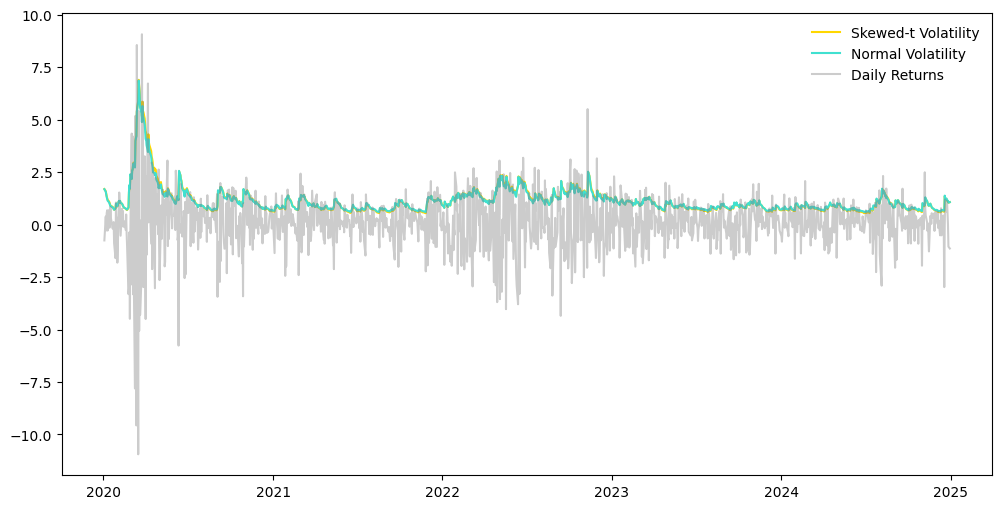

In [ ]:

normal_volatility = gm_result.conditional_volatility
skewt_volatility = skewt_result.conditional_volatility

plt.figure(figsize=(12,6))
plt.plot(skewt_volatility, color = 'gold', label = 'Skewed-t Volatility')
plt.plot(normal_volatility, color = 'turquoise', label = 'Normal Volatility')
plt.plot(spy['return'], color = 'grey', label = 'Daily Returns', alpha = 0.4)
plt.legend(loc = 'upper right', frameon=False)

In [ ]:
armean_gm = arch_model(spy['return'], p=1, q=1, mean='AR', lags=1, vol='GARCH', dist='skewt')
armean_result = armean_gm.fit()

Iteration:      1,   Func. Count:      9,   Neg. LLF: 130644.80502585576
Iteration:      2,   Func. Count:     21,   Neg. LLF: 256899.9256512962
Iteration:      3,   Func. Count:     32,   Neg. LLF: 101249.95375355275
Iteration:      4,   Func. Count:     42,   Neg. LLF: 24257.06375264816
Iteration:      5,   Func. Count:     51,   Neg. LLF: 32972.995072376776
Iteration:      6,   Func. Count:     60,   Neg. LLF: 1801.1315454146845
Iteration:      7,   Func. Count:     69,   Neg. LLF: 2077.482093344218
Iteration:      8,   Func. Count:     79,   Neg. LLF: 2149.734625203968
Iteration:      9,   Func. Count:     89,   Neg. LLF: 1794.6785866707937
Iteration:     10,   Func. Count:     98,   Neg. LLF: 1791.9826327521444
Iteration:     11,   Func. Count:    106,   Neg. LLF: 1791.959161716658
Iteration:     12,   Func. Count:    114,   Neg. LLF: 1791.9580782086896
Iteration:     13,   Func. Count:    122,   Neg. LLF: 1791.9578288671776
Iteration:     14,   Func. Count:    130,   Neg. LLF: 17

AR GARCH MODEL 

The AR-GARCH model is a powerful statistical tool used to model and forecast time series data, particularly financial returns that exhibit volatility clustering—periods of high and low volatility. The "AR" (AutoRegressive) part captures the linear dependence of the current value of the series on its past values, helping to explain patterns in the mean of the time series. The "GARCH" (Generalized Autoregressive Conditional Heteroskedasticity) part models the variance (volatility) of the series, accounting for time-varying volatility by expressing current variance as a function of past squared errors (shocks) and past variances. 

This makes the AR-GARCH model especially useful for financial markets, where large changes tend to be followed by large changes (of either sign), and small changes by small changes. By combining both components, the model provides a comprehensive framework for understanding and predicting both the level and volatility of financial time series.

In [ ]:
armean_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 AR - GARCH Model Results                                
=========================================================================================
Dep. Variable:                            return   R-squared:                       0.011
Mean Model:                                   AR   Adj. R-squared:                  0.010
Vol Model:                                 GARCH   Log-Likelihood:               -1791.96
Distribution:      Standardized Skew Student's t   AIC:                           3597.92
Method:                       Maximum Likelihood   BIC:                           3633.86
                                                   No. Observations:                 1255
Date:                           Fri, May 09 2025   Df Residuals:                     1253
Time:                                   04:44:52   Df Model:                            2
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
Const          0.1034  2.458e-02      4.207  2.588e-05 [5.524e-02,  0.152]
return[1]     -0.0446  3.122e-02     -1.428      0.153 [ -0.106,1.662e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0329  1.110e-02      2.965  3.024e-03 [1.115e-02,5.465e-02]
alpha[1]       0.1513  2.624e-02      5.768  8.044e-09   [9.991e-02,  0.203]
beta[1]        0.8301  2.673e-02     31.055 9.811e-212     [  0.778,  0.883]
                                Distribution                               
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
eta            9.1528      2.215      4.132  3.602e-05    [  4.811, 13.495]
lambda        -0.1733  4.721e-02     -3.670  2.424e-04 [ -0.266,-8.074e-02]
===========================================================================

Covariance estimator: robust
"""

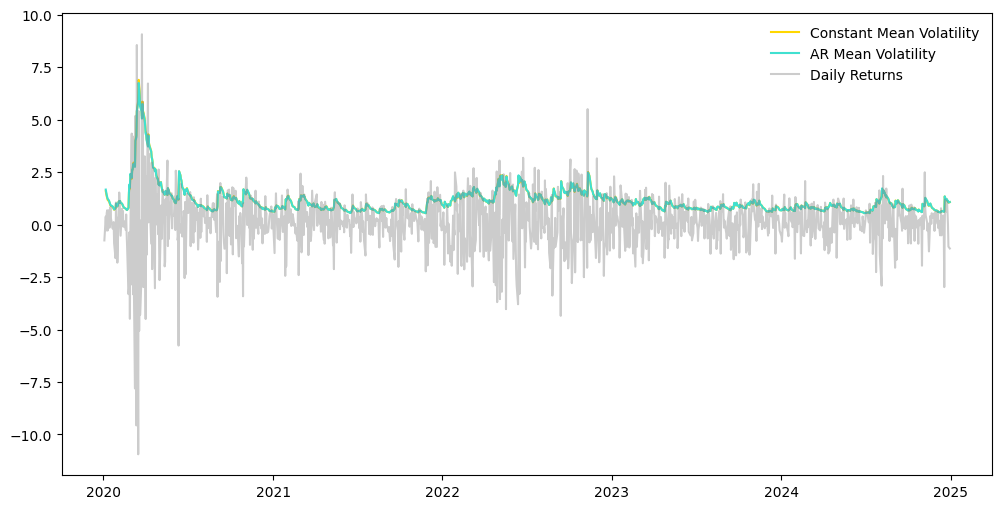

In [ ]:
armean_volatility = armean_result.conditional_volatility.dropna()
skewt_volatility = skewt_volatility.iloc[1:]

plt.figure(figsize=(12,6))
plt.plot(skewt_volatility, color = 'gold', label = 'Constant Mean Volatility')
plt.plot(armean_volatility, color = 'turquoise', label = 'AR Mean Volatility')
plt.plot(spy['return'], color = 'grey', label = 'Daily Returns', alpha = 0.4)
plt.legend(loc = 'upper right', frameon=False)

In [ ]:

np.corrcoef(skewt_volatility, armean_volatility)[0,1]

np.float64(0.9997719291703798)

EGARCH (asymmetric shock)

The Exponential GARCH (EGARCH) model is an extension of the standard GARCH model that addresses some of its limitations, particularly in capturing the asymmetric effects of shocks on volatility. Unlike the traditional GARCH, which assumes that positive and negative shocks have the same impact on volatility, EGARCH allows for asymmetry—meaning that negative shocks (bad news) can have a different, often greater, effect on volatility than positive shocks (good news). 

The model does this by modeling the logarithm of the variance, ensuring that the predicted variance is always positive without requiring non-negative constraints on parameters. This makes EGARCH especially useful in financial markets where downside risk typically triggers larger volatility than upside movements. Overall, EGARCH provides a more realistic and flexible approach to modeling volatility, especially when the goal is to capture the leverage effect observed in asset returns.

In [ ]:
egarch_gm = arch_model(spy['return'], p=1, q=1, o=1, mean='constant', vol='EGARCH', dist='skewt')
egarch_result = egarch_gm.fit()

Iteration:      1,   Func. Count:      9,   Neg. LLF: 17745.71828614796
Iteration:      2,   Func. Count:     22,   Neg. LLF: 187700.18116812548
Iteration:      3,   Func. Count:     33,   Neg. LLF: 27202.658388140426
Iteration:      4,   Func. Count:     45,   Neg. LLF: 77068.19296870395
Iteration:      5,   Func. Count:     57,   Neg. LLF: 60826.905007682886
Iteration:      6,   Func. Count:     67,   Neg. LLF: 19063.51702494546
Iteration:      7,   Func. Count:     76,   Neg. LLF: 1778.4345058538138
Iteration:      8,   Func. Count:     85,   Neg. LLF: 1770.611905993268
Iteration:      9,   Func. Count:     93,   Neg. LLF: 1769.7702337336254
Iteration:     10,   Func. Count:    101,   Neg. LLF: 1769.7161098053007
Iteration:     11,   Func. Count:    109,   Neg. LLF: 1769.7075599465468
Iteration:     12,   Func. Count:    117,   Neg. LLF: 1769.7054234845878
Iteration:     13,   Func. Count:    125,   Neg. LLF: 1769.7049486376056
Iteration:     14,   Func. Count:    133,   Neg. LLF: 1

In [ ]:
egarch_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Constant Mean - EGARCH Model Results                          
=========================================================================================
Dep. Variable:                            return   R-squared:                       0.000
Mean Model:                        Constant Mean   Adj. R-squared:                  0.000
Vol Model:                                EGARCH   Log-Likelihood:               -1769.70
Distribution:      Standardized Skew Student's t   AIC:                           3553.41
Method:                       Maximum Likelihood   BIC:                           3589.36
                                                   No. Observations:                 1256
Date:                           Fri, May 09 2025   Df Residuals:                     1255
Time:                                   05:05:29   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0489  2.479e-02      1.972  4.860e-02 [3.015e-04,9.748e-02]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      6.8199e-03  8.645e-03      0.789      0.430 [-1.012e-02,2.376e-02]
alpha[1]       0.1564  5.687e-02      2.750  5.968e-03    [4.490e-02,  0.268]
gamma[1]      -0.1673  2.031e-02     -8.237  1.767e-16      [ -0.207, -0.127]
beta[1]        0.9718  1.045e-02     93.004      0.000      [  0.951,  0.992]
                              Distribution                              
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
eta            8.3527      1.876      4.452  8.493e-06 [  4.676, 12.030]
lambda        -0.2086  4.968e-02     -4.199  2.676e-05 [ -0.306, -0.111]
========================================================================

Covariance estimator: robust
"""

 GJR-GARCH

The GJR-GARCH (Glosten–Jagannathan–Runkle GARCH) model is a variant of the GARCH model that accounts for asymmetric effects of shocks on volatility, similar to EGARCH but with a different structure. In the GJR-GARCH model, the conditional variance depends not only on past squared returns and past variances (as in GARCH) but also includes an additional term that captures the impact of negative shocks separately. This is done using an indicator function that activates only when past returns are negative, allowing the model to reflect the empirical observation that bad news tends to increase volatility more than good news of the same magnitude. This phenomenon is known as the leverage effect. The GJR-GARCH model is widely used in financial econometrics because it provides a better fit for return series with asymmetrical volatility patterns while maintaining a relatively simple structure.

In [ ]:
gjrgarch_gm = arch_model(spy['return'], p=1, q=1, o=1, mean='constant', vol='GARCH', dist='skewt')
gjrgarch_result = gjrgarch_gm.fit()

Iteration:      1,   Func. Count:      9,   Neg. LLF: 8159.3263454253665
Iteration:      2,   Func. Count:     22,   Neg. LLF: 60331.48728578151
Iteration:      3,   Func. Count:     32,   Neg. LLF: 45076.87265963233
Iteration:      4,   Func. Count:     41,   Neg. LLF: 4540.552462118829
Iteration:      5,   Func. Count:     50,   Neg. LLF: 35234.59280578887
Iteration:      6,   Func. Count:     59,   Neg. LLF: 1781.044863551674
Iteration:      7,   Func. Count:     68,   Neg. LLF: 2110.554867145287
Iteration:      8,   Func. Count:     78,   Neg. LLF: 1774.9897477172135
Iteration:      9,   Func. Count:     87,   Neg. LLF: 1773.5368666175484
Iteration:     10,   Func. Count:     95,   Neg. LLF: 1773.5303640843024
Iteration:     11,   Func. Count:    104,   Neg. LLF: 1860.6358703354767
Iteration:     12,   Func. Count:    114,   Neg. LLF: 1773.4361209725926
Iteration:     13,   Func. Count:    123,   Neg. LLF: 1773.4279893173434
Iteration:     14,   Func. Count:    132,   Neg. LLF: 177

In [ ]:
gjrgarch_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         Constant Mean - GJR-GARCH Model Results                         
=========================================================================================
Dep. Variable:                            return   R-squared:                       0.000
Mean Model:                        Constant Mean   Adj. R-squared:                  0.000
Vol Model:                             GJR-GARCH   Log-Likelihood:               -1773.42
Distribution:      Standardized Skew Student's t   AIC:                           3560.84
Method:                       Maximum Likelihood   BIC:                           3596.79
                                                   No. Observations:                 1256
Date:                           Fri, May 09 2025   Df Residuals:                     1255
Time:                                   05:06:11   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0593  2.426e-02      2.445  1.450e-02 [1.176e-02,  0.107]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0347  1.218e-02      2.847  4.408e-03  [1.081e-02,5.857e-02]
alpha[1]   8.6503e-04  2.075e-02  4.168e-02      0.967 [-3.981e-02,4.154e-02]
gamma[1]       0.2418  5.884e-02      4.109  3.966e-05      [  0.126,  0.357]
beta[1]        0.8579  3.598e-02     23.847 1.094e-125      [  0.787,  0.928]
                                Distribution                               
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
eta            8.2691      1.886      4.386  1.157e-05    [  4.573, 11.965]
lambda        -0.1887  4.747e-02     -3.976  7.015e-05 [ -0.282,-9.569e-02]
===========================================================================

Covariance estimator: robust
"""

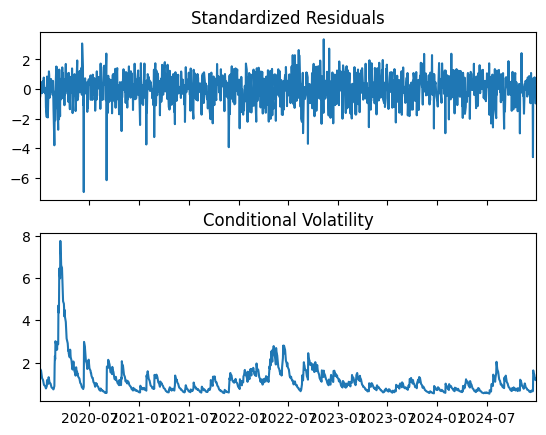

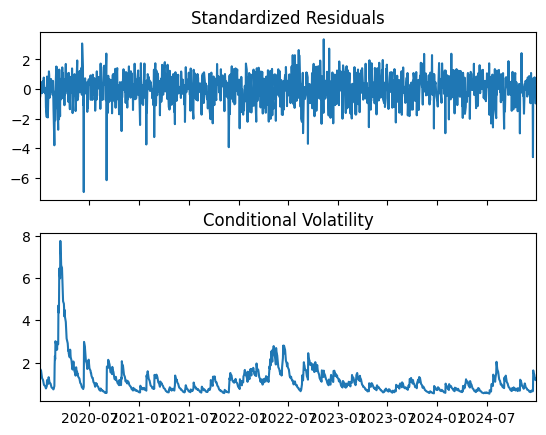

In [ ]:
gjrgarch_result.plot()

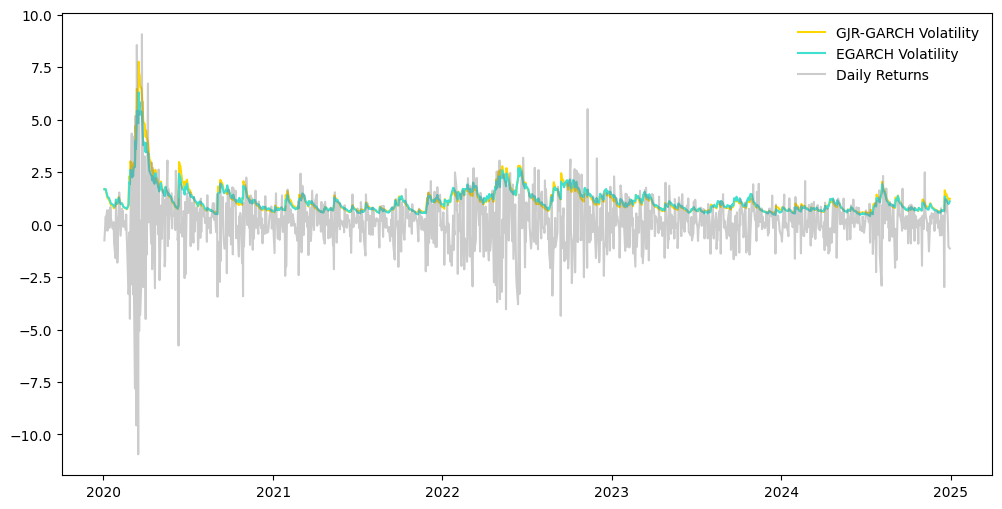

In [ ]:

gjrgarch_volatility = gjrgarch_result.conditional_volatility
egarch_volatility = egarch_result.conditional_volatility


plt.figure(figsize=(12,6))
plt.plot(gjrgarch_volatility, color = 'gold', label = 'GJR-GARCH Volatility')
plt.plot(egarch_volatility, color = 'turquoise', label = 'EGARCH Volatility')
plt.plot(spy['return'], color = 'grey', label = 'Daily Returns', alpha = 0.4)
plt.legend(loc = 'upper right', frameon=False)

## 5. Goodness of Fit

1. Log Likelhood (maximize)
2. Information Criteria (AIC, BIC) (minimize)

Goodness of fit refers to how well a statistical model captures or represents the observed data. It indicates the degree to which the model's predicted values align with the actual data points. In other words, it measures the accuracy and effectiveness of a model in describing the underlying relationship between variables. A high goodness of fit means the model explains a large portion of the variation in the data, while a low goodness of fit suggests that the model fails to capture important patterns.

In time series and regression models, common metrics to evaluate goodness of fit include:

R-squared (R²): Indicates the proportion of the variance in the dependent variable explained by the model.

Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE): Measure the average magnitude of prediction errors.

Akaike Information Criterion (AIC) and Bayesian Information Criterion (BIC): Evaluate model fit while penalizing complexity to prevent overfitting.



In [ ]:

def goodness_of_fit():
  global df
  model_names = ['normal', 'skewt', 'GJR-GARCH', 'EGARCH']
  models = [gm_result, skewt_result, gjrgarch_result, egarch_result]
  likelihood = [model.loglikelihood for model in models]
  aic = [model.aic for model in models]
  bic = [model.bic for model in models]
  dict = {'model':model_names, 'log likelihood':likelihood, 'aic':aic,'bic':bic}
  df = pd.DataFrame(dict).set_index('model')
  return df

goodness_of_fit()

,log likelihood,aic,bic
model,,,
normal,-1824.394796,3656.789593,3677.332342
skewt,-1794.338927,3600.677855,3631.491979
GJR-GARCH,-1773.421808,3560.843615,3596.793427
EGARCH,-1769.704877,3553.409754,3589.359565


In [ ]:

df.style.highlight_max(subset='log likelihood', color = 'yellow', axis = 0)

,log likelihood,aic,bic
model,,,
normal,-1824.394796,3656.789593,3677.332342
skewt,-1794.338927,3600.677855,3631.491979
GJR-GARCH,-1773.421808,3560.843615,3596.793427
EGARCH,-1769.704877,3553.409754,3589.359565


In [ ]:

df.style.highlight_min(subset=['aic', 'bic'], color = 'yellow', axis = 0)

,log likelihood,aic,bic
model,,,
normal,-1824.394796,3656.789593,3677.332342
skewt,-1794.338927,3600.677855,3631.491979
GJR-GARCH,-1773.421808,3560.843615,3596.793427
EGARCH,-1769.704877,3553.409754,3589.359565


Parameter Significance Testing

In [ ]:

parameters = pd.DataFrame({'parameter': gjrgarch_result.params,
                           'p-value': gjrgarch_result.pvalues})

parameters

,parameter,p-value
mu,0.059308,1.450213e-02
omega,0.034691,4.407871e-03
alpha[1],0.000865,9.667513e-01
gamma[1],0.241817,3.965680e-05
beta[1],0.857893,1.094364e-125
eta,8.269052,1.156911e-05
lambda,-0.188724,7.015477e-05


Standardized Residuals

[Text(0.5, 1.0, 'Standardized Resduals')]

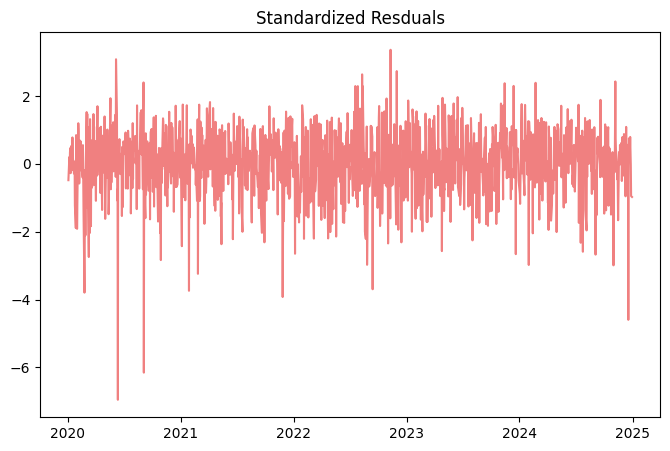

In [ ]:
# Calculate standardized residual
gjrgarch_std_resid = gjrgarch_result.resid / gjrgarch_result.conditional_volatility

# Plot
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(gjrgarch_std_resid, color='lightcoral')
ax.set(title='Standardized Resduals')

ACF Plot

In the context of GARCH models, ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function) plots are crucial diagnostic tools used both before and after model estimation. Before fitting the model, analysts examine the ACF and PACF of the raw return series to identify any serial correlation, which may suggest including AR or MA terms in the mean equation. More importantly, the ACF and PACF of the squared or absolute returns are analyzed to detect volatility clustering—a hallmark of financial time series—indicated by significant autocorrelations. 

After fitting a GARCH model, the ACF and PACF of the standardized residuals and their squares are examined. Ideally, these plots should show no significant autocorrelations, implying that the model has adequately captured the dynamics in both the mean and variance. If autocorrelation persists, it suggests model misspecification, indicating that the mean or volatility structure needs refinement

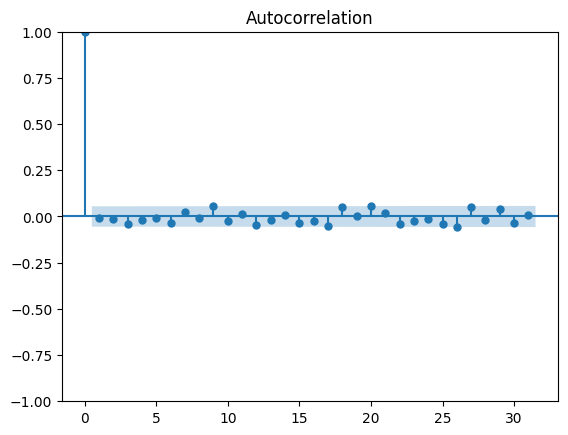

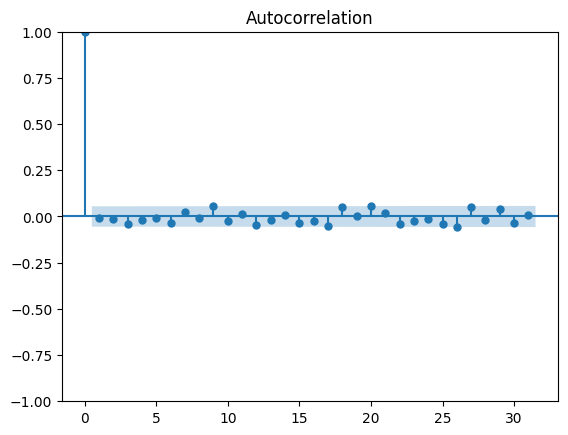

In [ ]:

from statsmodels.graphics.tsaplots import plot_acf


plot_acf(gjrgarch_std_resid, alpha=0.05)

Ljung-Box tests for overall randomness of standardized residuals. The null hypothesis is that the data is independently distributed. P-values <5% means the residuals aren't independently distributed and the model isn't sound

The Ljung-Box test is a statistical test used to check for the presence of autocorrelation in time series data. Specifically, it evaluates whether any group of autocorrelations of a time series (or residuals from a fitted model) is significantly different from zero. This helps determine whether a model has adequately captured the time dependence in the data.

In the context of GARCH modeling, the Ljung-Box test is typically applied to:

Standardized residuals – to test whether the mean dynamics are correctly specified.

Squared standardized residuals – to test whether the model has adequately captured the conditional variance (volatility).

A high p-value (typically > 0.05) means the residuals behave like white noise, indicating a good fit. A low p-value suggests significant autocorrelation remains, pointing to model misspecification.

In [ ]:



lb_test = acorr_ljungbox(gjrgarch_std_resid, lags=10)


p_values = pd.DataFrame({'P-values': lb_test['lb_pvalue']}).T


col_num = p_values.shape[1]
col_names = ['lag_'+str(num) for num in list(range(1,col_num+1,1))]


p_values.columns = col_names
p_values

,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10
P-values,0.781596,0.875842,0.521418,0.587286,0.72032,0.585948,0.588247,0.687177,0.397642,0.432184
